In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [ ]:
# Load the data
file_path = "/content/loan_Sanction_status.xlsx"
loansanction = pd.read_excel(file_path)

# Display the first few rows
print(loansanction.head())

    Loan_ID  LoanAmount  Gender  Married  Dependents  Education  \
0  LP001002      3509.4       1        0           0          1   
1  LP001003       128.0       1        1           1          1   
2  LP001005        66.0       1        1           0          1   
3  LP001006       120.0       1        1           0          2   
4  LP001008       141.0       1        0           0          1   

   Self_Employed  ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  \
0              0             5849                0.0               360   
1              0             4583             1508.0               360   
2              1             3000                0.0               360   
3              0             2583             2358.0               360   
4              0             6000                0.0               360   

   Credit_History  Property_Area  Loan_Status  
0               1              1            1  
1               1              3            0  
2       

In [ ]:
# prompt: check null values

# Check for null values
print(loansanction.isnull().sum())


Loan_ID              0
LoanAmount           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## THERE ARE NO NULL VALUES

In [ ]:
# prompt: check dupliactes

# Check for duplicate rows
duplicate_rows = loansanction[loansanction.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Number of duplicate rows
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")


Duplicate Rows:
Empty DataFrame
Columns: [Loan_ID, LoanAmount, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

Number of duplicate rows: 0


# NO DUPLICATES

In [ ]:
# prompt: drop Loan_ID column

loansanction = loansanction.drop(columns=['Loan_ID'])


# LOAN ID DROPPED

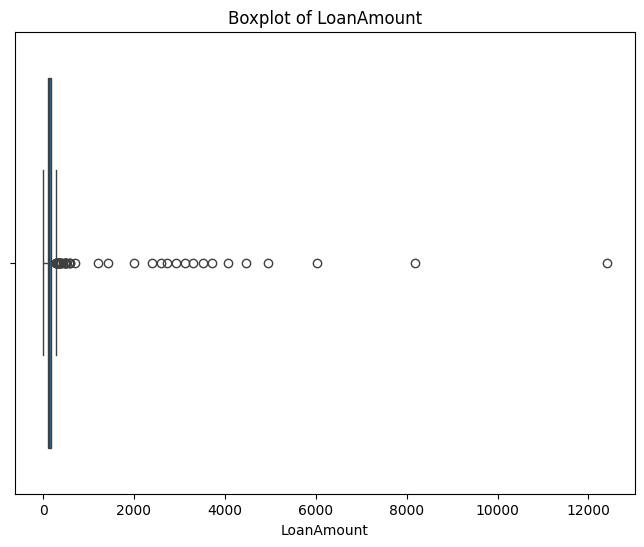

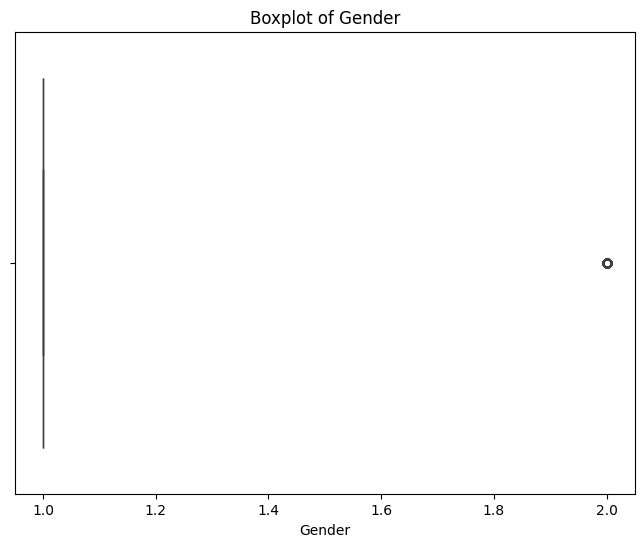

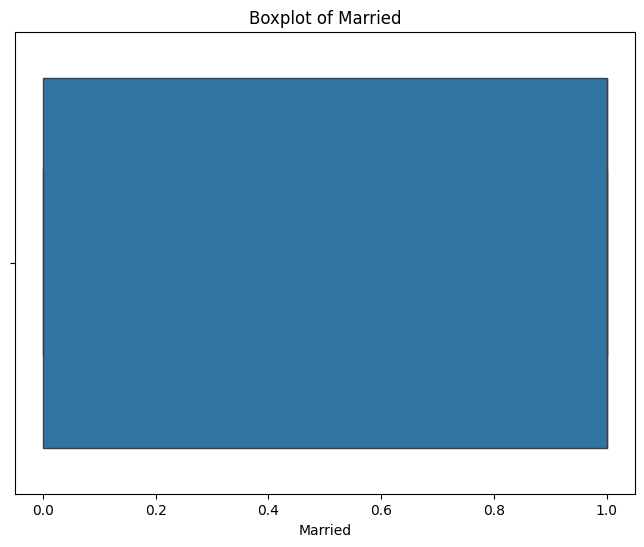

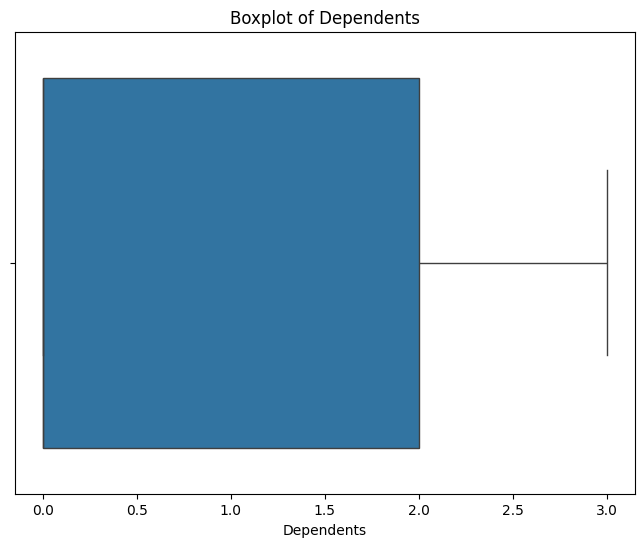

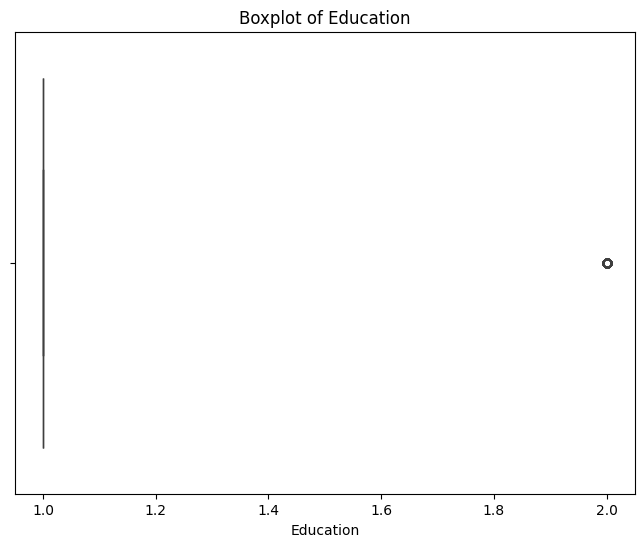

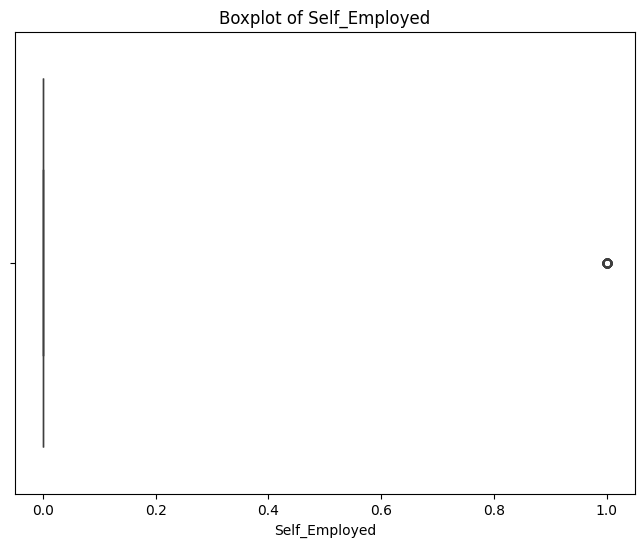

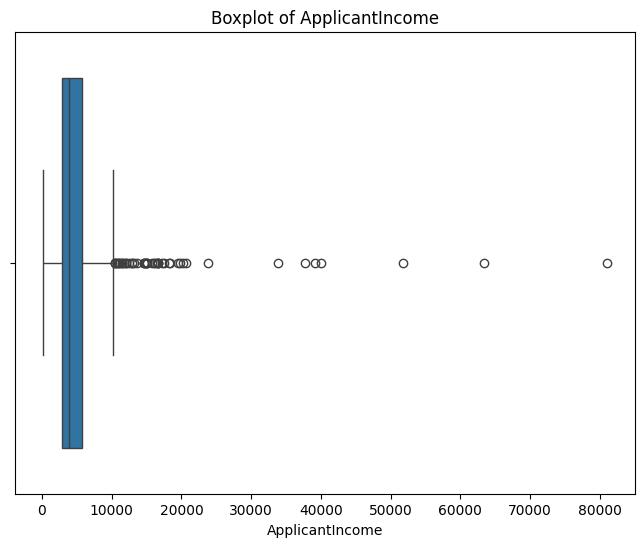

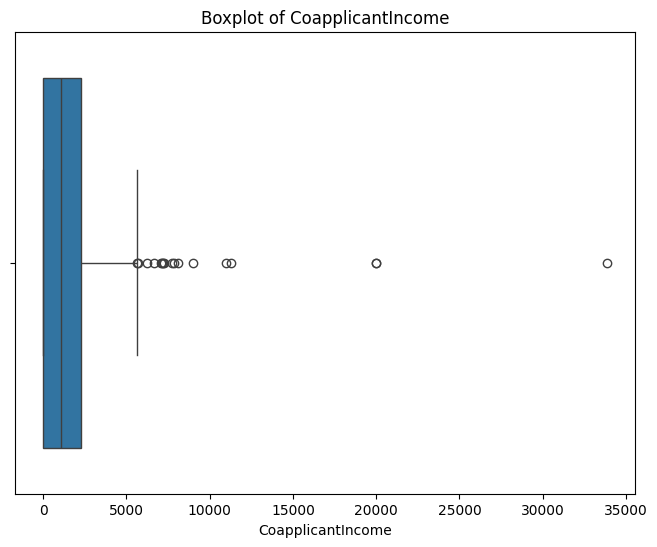

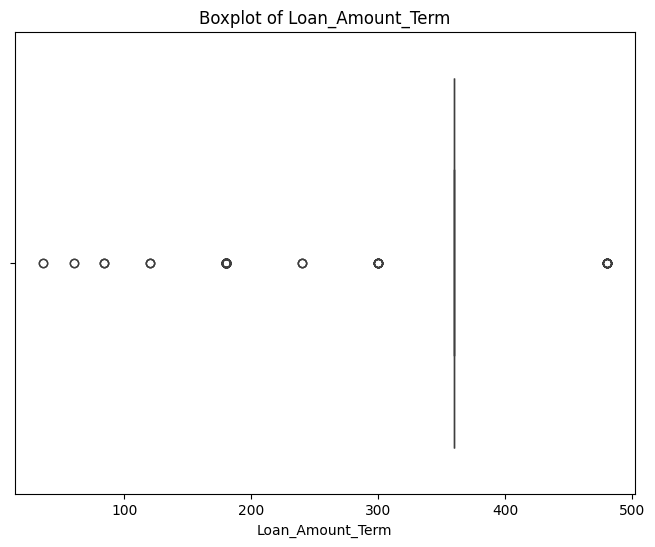

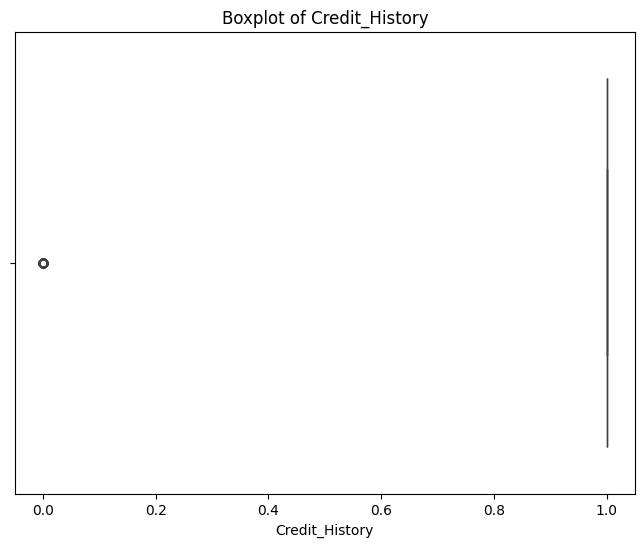

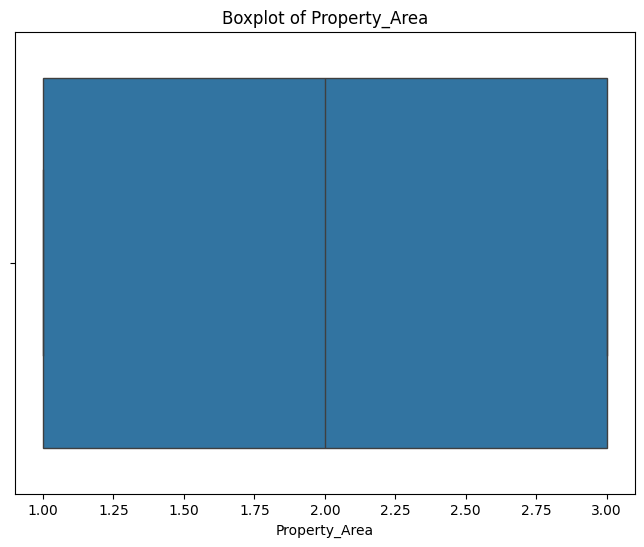

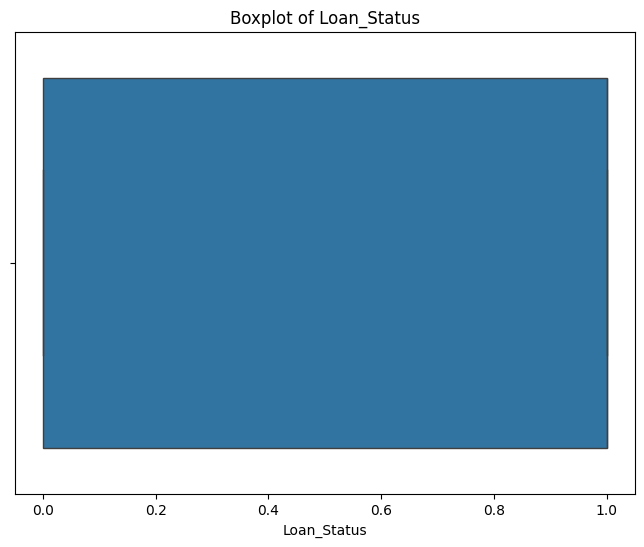

In [ ]:
# prompt: check outliers using boxplot

import matplotlib.pyplot as plt
import numpy as np
# Check for outliers using boxplots for all numerical columns
numerical_cols = loansanction.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=loansanction[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Outliers in columns like gender, Education, self employed etc are not to be treated as these columns are categorical in nature.Hence, outliers for only loan amount will be treated.

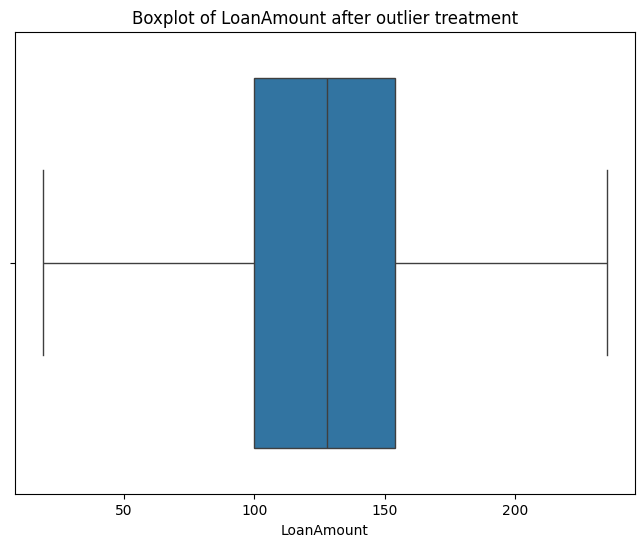

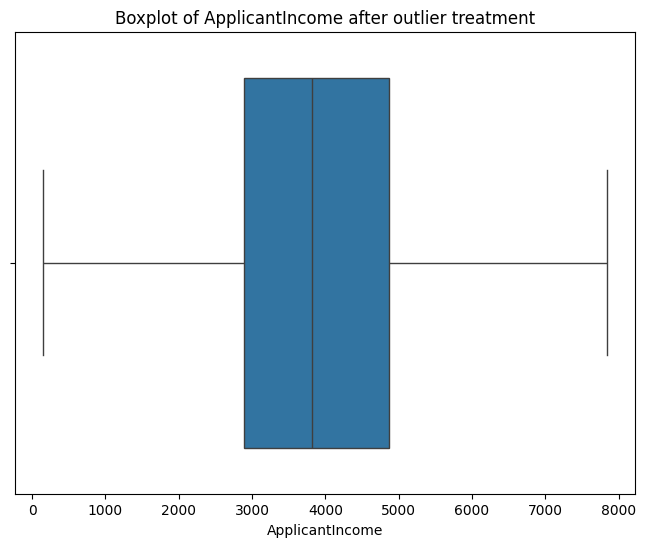

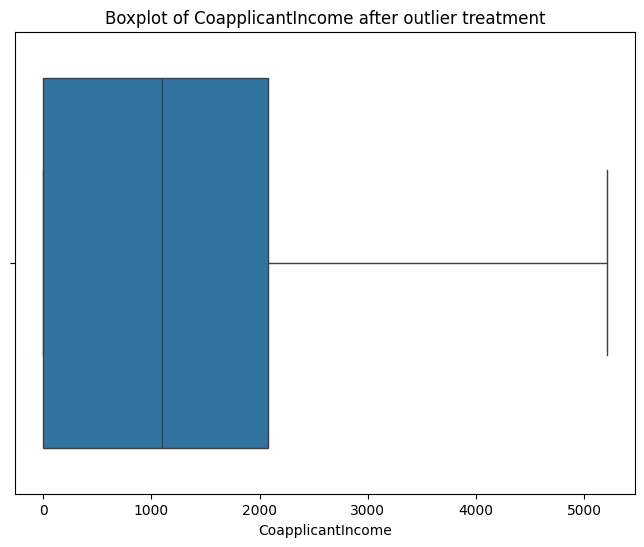

In [ ]:
# prompt: Treat outliers in LoanAmount, ApplicantIncome and CoapplicantIncome

import matplotlib.pyplot as plt
import numpy as np
# ... (Your existing code)

def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Treat outliers in LoanAmount
loansanction = treat_outliers(loansanction, 'LoanAmount')

# Treat outliers in ApplicantIncome
loansanction = treat_outliers(loansanction, 'ApplicantIncome')

# Treat outliers in CoapplicantIncome
loansanction = treat_outliers(loansanction, 'CoapplicantIncome')

# Verify the changes (optional)
for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=loansanction[col])
    plt.title(f'Boxplot of {col} after outlier treatment')
    plt.show()


## Outliers are treated


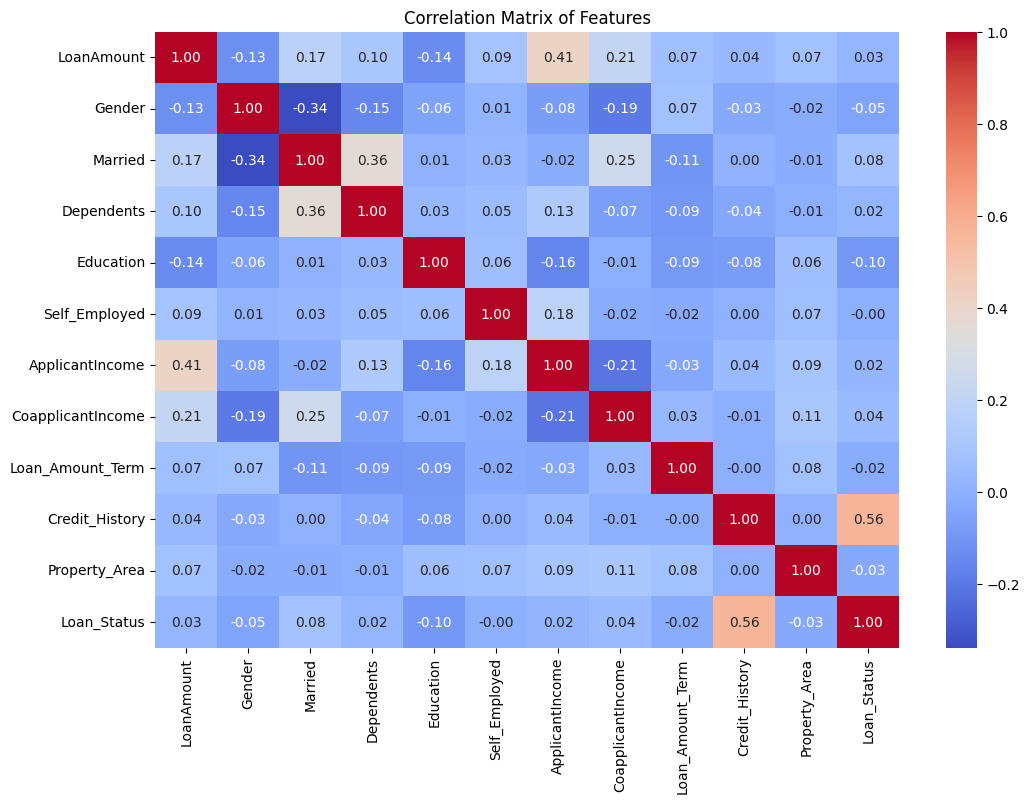

In [ ]:
# prompt: generate correlation using heat map

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = loansanction.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# prompt: Perform Logistic regression using stats model. define y as Loan_Status and rest as x

import statsmodels.api as sm

# Assuming 'loansanction' DataFrame is already loaded and preprocessed as in your provided code.

# Define features (X) and target (y)
X = loansanction.drop('Loan_Status', axis=1)
y = loansanction['Loan_Status']

# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.461023
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  564
Model:                          Logit   Df Residuals:                      552
Method:                           MLE   Df Model:                           11
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                  0.2622
Time:                        19:56:57   Log-Likelihood:                -260.02
converged:                       True   LL-Null:                       -352.43
Covariance Type:            nonrobust   LLR p-value:                 1.033e-33
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8091      1.047     -1.728      0.084      -3.861       0.243
LoanAmou

In [ ]:
# prompt: VIF

import pandas as pd
# ... (Your existing code)

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for the features
vif_data = calculate_vif(X)
vif_data


,variables,VIF
0,const,85.176211
1,LoanAmount,1.401216
2,Gender,1.179003
3,Married,1.385092
4,Dependents,1.213747
5,Education,1.073231
6,Self_Employed,1.048941
7,ApplicantIncome,1.464627
8,CoapplicantIncome,1.310500
9,Loan_Amount_Term,1.043583


In [ ]:
# prompt:  Do step by step regression and drop insignificant columns one by one

# Function to perform stepwise regression and drop insignificant columns
def stepwise_regression(X, y, significance_level=0.05):
    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Initialize variables
    included_columns = list(X.columns)
    while True:
        model = sm.Logit(y, X[included_columns]).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude the constant
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            column_to_remove = p_values.idxmax()
            included_columns.remove(column_to_remove)
            print(f"Removed column: {column_to_remove}")
            print(f"Current columns: {included_columns}")  # Print current columns
        else:
            break
    return included_columns, model

# Perform stepwise regression
significant_columns, final_model = stepwise_regression(X.drop('const', axis=1), y)

# Print the final model summary
print(final_model.summary())

# Use the significant columns for further analysis or model building.
X_final = X[significant_columns]

# Example: Fit a new model with the significant columns
final_model = sm.Logit(y, X_final).fit()
print(final_model.summary())


Optimization terminated successfully.
         Current function value: 0.461023
         Iterations 6
Removed column: Self_Employed
Current columns: ['const', 'LoanAmount', 'Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Optimization terminated successfully.
         Current function value: 0.461024
         Iterations 6
Removed column: Gender
Current columns: ['const', 'LoanAmount', 'Married', 'Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Optimization terminated successfully.
         Current function value: 0.461039
         Iterations 6
Removed column: ApplicantIncome
Current columns: ['const', 'LoanAmount', 'Married', 'Dependents', 'Education', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Optimization terminated successfully.
         Current function value: 0.461096
         Iterati

# The logistic model was improved by removing factors with High p-value(above 0.05) indicating low significance. Variables like self employed, applicant income, Loan amount etc were eliminated step by step due to their less significance starting with the variables having highest p-value.


# General equation for Sigmoid curve =P(Y=1)= (e^z)/(1+e^z)                                        
# i.e. the probability of loan getting sanction
# where z = beta0 + beta1x1 + beta2x2……+ betanxn  
# =[2.811+(0.509*Married)+(3.860*Credit_History)]

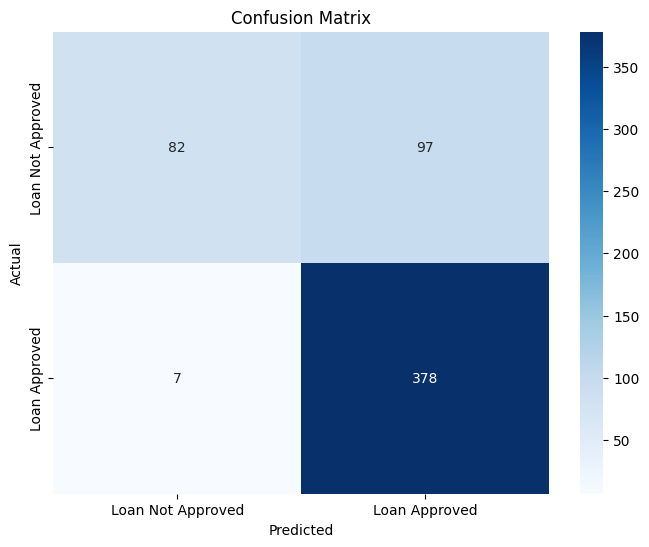

In [ ]:
# prompt: generate confusion matrix using stats model

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_model' and 'X_final' are defined from the previous code.

# Predict the probabilities
y_pred_prob = final_model.predict(X_final)

# Convert probabilities to class predictions (e.g., using a threshold of 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Loan Not Approved', 'Loan Approved'],
            yticklabels=['Loan Not Approved', 'Loan Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# TRUE CLASSIFICATION:
Following are cases where the model made the right prediction:
•	True Positives (378): It means that the model has correctly made prediction that 378 loan cases are eligible for loan sanctioning based on marital status and credit history

•	True Negatives (82) : It means that the model correctly predicted rejection of 82 cases based on marital status and credit history them being risky.

MISCLASSIFICATION: Following are cases where the model made the wrong prediction:

•	False Positives (97): The model wrongly predicted that 97 loan cases were eligible for loan sanctioning, but in reality, they were risky and should have been rejected.

•	False Negatives (7): The model wrongly predicted that 7 loan cases were not eligible for loan sanctioning, but in reality, they were actually safe and should have been approved

In [ ]:
# prompt: AUC

from sklearn.metrics import roc_auc_score

# Assuming 'final_model' and 'X_final' are defined from the previous code, and y is the true target variable.
y_pred_prob = final_model.predict(X_final)

# Calculate the AUC score
auc = roc_auc_score(y, y_pred_prob)

print(f"AUC Score: {auc}")


AUC Score: 0.7557933686425307


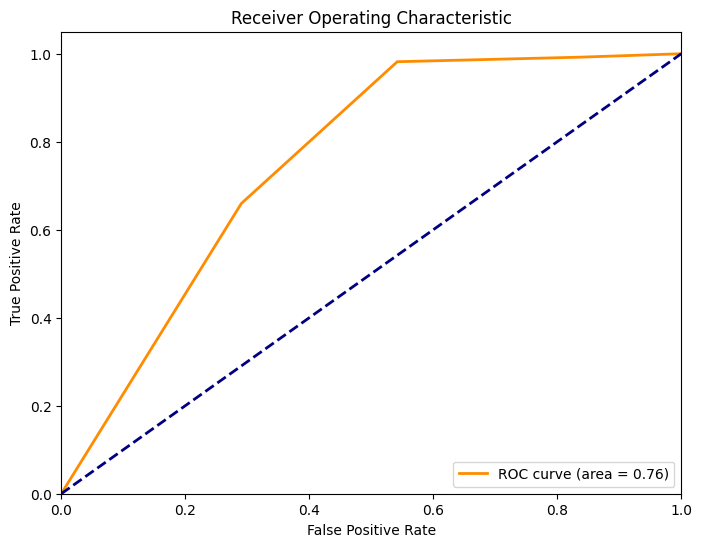

In [ ]:
# prompt: AUC and roc curve using stats model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'final_model' and 'X_final' are defined from the previous code.

# Predict the probabilities
y_pred_prob = final_model.predict(X_final)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


(AUC) Area under Curve: 0.7557933686425307

1.	It states that the classification model has overall accuracy of 75.58%.
2.	AUC represents that if there are 100 data points, then 75.58 data points out of them lie below the curve that is the sigmoid curve (which takes the shape of yes curve).
3.	As, AUC is closer to 1 so it has higher reliability in differentiating between sanctioned and not sanctioned loans.